In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl
import scipy as sp
from scipy import stats
from scipy import signal
from scipy import fft
from scipy import io
from scipy import interpolate
from scipy import optimize
from scipy import linalg
from scipy import integrate
from scipy.fft import dct

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

#from MEM_class import MEM

#from synthData_Gen import SyntheticData_Gen

# Isotope types examples

In [2]:
saveFigs = False

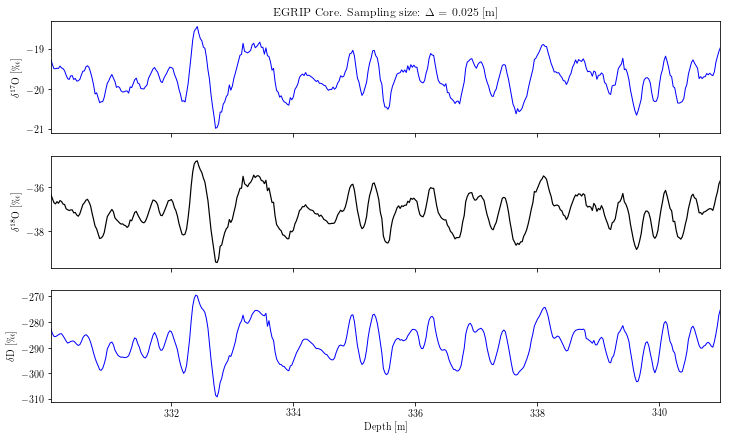

In [3]:
iso_ex = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/egrip22pbag_601_620_1st.out', '\t')
sampleSize = iso_ex['Depth'][1] - iso_ex['Depth'][0]

figIso, axIso = plt.subplots(3,1, figsize=(12,7), sharex=True)

axIso[0].plot(iso_ex['Depth'], iso_ex['d17'],'b',lw=1)
axIso[1].plot(iso_ex['Depth'], iso_ex['d18'],'k',lw=1.2)
axIso[2].plot(iso_ex['Depth'], iso_ex['dD'],'b',lw=1)

axIso[0].set(ylabel='$\delta ^{17}$O [\permil]', title=f'EGRIP Core. Sampling size: $\Delta = $ {sampleSize:.3f} [m]')
axIso[1].set(ylabel='$\delta ^{18}$O [\permil]')
axIso[2].set(xlabel='Depth [m]', ylabel='$\delta$D [\permil]', xlim=(iso_ex['Depth'].min(),iso_ex['Depth'].max()));

if saveFigs:
    figIso.savefig('../../WrittenWork/NovemberPresentation/d17d18dD_ExamplesEGRIP.eps')

# Site A analysis

In [4]:
siteA_dens = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/Site_A_Densities.txt', '\t')
siteA_atten = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/Site_A_Attenuation.txt', '\t')
siteA_aso = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/Site_A_WaterIsotopes.txt', '\t')

### Site A density

In [5]:
Temp0 = 243.75 # [K]
bdot0 = 0.307#0.267764 # [m W.E.]
dens0 = siteA_dens['rho_measured'][0] # [kg/m^3]
z_vec = siteA_dens['depth']
rho_vec = siteA_dens['rho_measured']

In [6]:
import sys

sys.path.insert(1, '/home/thea/Documents/KUFysik/MesterTesen/Analysis/')
import HL_AnalyticThea_class

In [7]:
from HL_AnalyticThea_class import HL_Thea

hl_inst = HL_Thea(z_meas = z_vec, rho_meas = rho_vec,\
                     Acc_0 = bdot0, Temp_0 = Temp0, rho_0 = dens0, opti = False)
hl_model = hl_inst.model(z_vec)

hl_instOpti = HL_Thea(z_meas = z_vec, rho_meas = rho_vec,\
                     Acc_0 = bdot0, Temp_0 = Temp0, rho_0 = dens0, opti = True)

hl_modelOpti = hl_instOpti.model(z_vec)
f0 = hl_modelOpti['f0_fin']; f1 = hl_modelOpti['f1_fin']

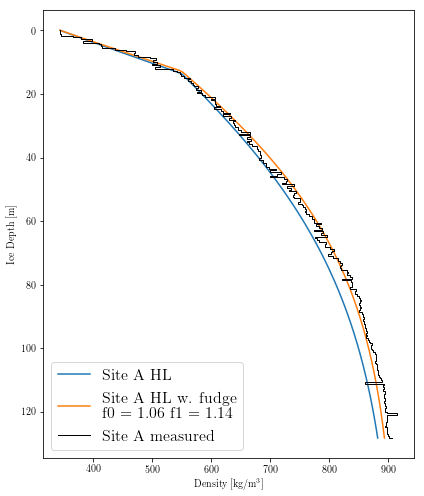

In [8]:
fig1, ax1 = plt.subplots(figsize=(6,7))

ax1.set(xlabel='Density [kg/m$^3$]', ylabel='Ice Depth [m]')
ax1.invert_yaxis()
ax1.plot(hl_model['rhoHL']*1000, z_vec, label='Site A HL')
ax1.plot(hl_modelOpti['rhoHL']*1000, z_vec, label=f'Site A HL w. fudge\nf0 = {f0:.2f} f1 = {f1:.2f}')

ax1.step(rho_vec, z_vec,'k',lw=1,label='Site A measured')
ax1.legend(fontsize=16)
fig1.tight_layout()
if saveFigs:
    fig1.savefig('../../WrittenWork/NovemberPresentation/SiteA_HLdensity.eps')

### Site A diffusion

In [9]:
sys.path.insert(1, '/home/thea/Documents/KUFysik/MesterTesen/Analysis/')
    import sigma
    from sigma import SigmaToolbox


IndentationError: unexpected indent (<ipython-input-9-5176478353cd>, line 2)

In [ ]:
sigma_inst = SigmaToolbox()
sigma_arr = sigma_inst.experiment2(P = 1, temp = Temp0, accum = bdot0, rho_o = dens0, \
                        fo = f0, f1 = f1, dz = 0.55, z_final = max(z_vec), fileout = False)

In [ ]:
LakiDepth = 80.85
TambDepth = 70.90

z_LT = z_vec[(z_vec >= TambDepth) & (z_vec <= LakiDepth)]
sigma_LT = sigma_arr[(z_vec >= TambDepth) & (z_vec <= LakiDepth)]


In [ ]:
figDiff, axDiff = plt.subplots(figsize=(6,7))

axDiff.set(xlabel='Diffusion Length $\sigma$ [m]', ylabel='Ice depth [m]')
axDiff.invert_yaxis()
axDiff.plot(sigma_arr,z_vec, 'b', lw=1)
axDiff.plot(sigma_LT,z_LT, 'k', lw=3)
axDiff.axhline(y = TambDepth, alpha=0.8, color='k', ls='--', lw=1.5)
axDiff.axhline(y = LakiDepth, alpha=0.8, color='k', ls='--', lw=1.5)
axDiff.axvline(x = sigma_LT[0], alpha=0.8, color='k', ls='--', lw=1.5)
axDiff.axvline(x = sigma_LT[-1], alpha=0.8, color='k', ls='--', lw=1.5)

axDiff.grid(True, color='grey',ls='-.')
figDiff.tight_layout()
if saveFigs:
    figDiff.savefig('../../WrittenWork/NovemberPresentation/SiteA_DiffLen.eps')

In [ ]:
sigmaA_max = sigma_LT[0]
sigmaA_min = sigma_LT[-1]

In [ ]:

SiteA = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/SiteA_det.txt', ' ')[1:]
depth_siteA =SiteA['depth']
d18O_siteA = SiteA['d18O']

depthA_LT = depth_siteA[(depth_siteA >= TambDepth) & (depth_siteA <= LakiDepth)]
d18OA_LT = d18O_siteA[(depth_siteA >= TambDepth) & (depth_siteA <= LakiDepth)]

In [ ]:
figA_Iso, axA_Iso = plt.subplots(figsize=(10,7))

axA_Iso.plot(depth_siteA, d18O_siteA,'dodgerblue',lw=1)
axA_Iso.plot(depthA_LT, d18OA_LT,'k',lw=0.8)
axA_Iso.set(xlim=(depth_siteA.min(), depth_siteA.max()), xlabel='Ice depth [m]',ylabel='$\delta ^{18}$O [\permil]')
axA_Iso.axvline(x=TambDepth,color='k',lw=1, ls='-.')
axA_Iso.axvline(x=LakiDepth,color='k',lw=1, ls='-.')

if saveFigs:
    figA_Iso.savefig('../../WrittenWork/NovemberPresentation/SiteA_FullIso.eps')

In [ ]:
figA_IsoLT, axA_IsoLT = plt.subplots(figsize=(10,7))

axA_IsoLT.plot(depthA_LT, d18OA_LT,lw=1.2)
axA_IsoLT.set(xlim=(depthA_LT.min(),depthA_LT.max()), xlabel='Ice depth [m]',ylabel='$\delta ^{18}$O [\permil]')

if saveFigs:
    figA_IsoLT.savefig('../../WrittenWork/NovemberPresentation/SiteA_LTIso.eps')

In [ ]:
from scipy import interpolate

def interpCores(valMin, valMax, d_in, x_in):
    d = d_in[(d_in >= valMin) & (d_in <= valMax)]
    x = x_in[(d_in >= valMin) & (d_in <= valMax)]
    
    diff = np.diff(d)
    Delta = round(min(diff), 3)
    
    d_min = Delta * np.ceil(d.values[0]/Delta)
    d_max = Delta * np.floor(d.values[-1]/Delta)

    n = int(1 + (d_max - d_min)/Delta)
    
    j_arr = np.linspace(0,n,n)
    dhat = d_min + (j_arr - 1)*Delta
    
    f = interpolate.CubicSpline(d,x)
    
    xhat = f(dhat)
    
    return dhat, xhat, Delta

In [ ]:
depthA_LT_int, d18OA_LT_int, Delta = interpCores(np.asarray(depthA_LT)[0], np.asarray(depthA_LT)[-1], depthA_LT, d18OA_LT)

In [ ]:
figA_IsoLT, axA_IsoLT = plt.subplots(figsize=(10,7))

axA_IsoLT.plot(depthA_LT, d18OA_LT,lw=1.2, label='Measured')
axA_IsoLT.plot(depthA_LT_int, d18OA_LT_int,color='k',lw=1, alpha=0.8, linestyle='--', label='Spline interp., $\Delta =$ '+f'{Delta:.3f}')
axA_IsoLT.set(xlim=(depthA_LT.min(),depthA_LT.max()), xlabel='Ice depth [m]',ylabel='$\delta ^{18}$O [\permil]')
axA_IsoLT.legend()

if saveFigs:
    figA_IsoLT.savefig('../../WrittenWork/NovemberPresentation/SiteA_LTIso_int.eps')

In [ ]:
figA_Iso, axA_Iso = plt.subplots(figsize=(6,4))
plt.rcParams.update({'font.size': 22})

axA_Iso.plot(depth_siteA, d18O_siteA,'dodgerblue',lw=1)
axA_Iso.plot(depthA_LT, d18OA_LT,'k',lw=0.8)
axA_Iso.set(xlim=(depth_siteA.min(), depth_siteA.max()), xlabel='Ice depth [m]',ylabel='$\delta ^{18}$O [\permil]')
axA_Iso.axvline(x=TambDepth,color='k',lw=1, ls='-.')
axA_Iso.axvline(x=LakiDepth,color='k',lw=1, ls='-.')

x1 = depthA_LT.min()
x2 = depthA_LT.max()
y1 = -39
y2 = -29

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

axins = inset_axes(axA_Iso, 6,4, loc=2, bbox_to_anchor=(0.7,0.3,1,1), bbox_transform=axA_Iso.figure.transFigure)#loc=5) # zoom = 2
axins.plot(depthA_LT, d18OA_LT, label='Measured', lw=1.2)
axins.plot(depthA_LT_int, d18OA_LT_int,color='k',lw=1, alpha=0.8, linestyle='--', label='Spline interp., $\Delta =$ '+f'{Delta:.3f}')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.legend(fontsize=16)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(axA_Iso, axins, loc1=2, loc2=3, fc="none", ec="0.5")
#plt.draw()
#plt.show()

if saveFigs:
    figA_Iso.savefig('../../WrittenWork/NovemberPresentation/SiteA_Iso_int_Inset.eps', bbox_inches = 'tight')

In [ ]:
from Decon import SpectralDecon

decon_inst = SpectralDecon(depthA_LT_int, d18OA_LT_int, 2000)

In [ ]:
a,b = decon_inst.plotSpectrum(showFig=False)
print(f'Estimated min. Diff. Len (anal.): {sigmaA_min*100:.3f}')
print(f'Estimated max. Diff. Len (anal.): {sigmaA_max*100:.3f}')

In [ ]:

b.set_xlabel('Frequency [cycles/m]',fontsize=35)
b.set_ylabel('PSD [\permil$^2$/m]',fontsize=35)
b.set_ylim((1e-8,10))
b.legend(fontsize=25)
if saveFigs:
    a.tight_layout()
    a.savefig('../../WrittenWork/NovemberPresentation/SiteA_PSD.eps')
a

In [ ]:
sigma_min = sigmaA_min
sigma_max = 8.5/100

sigma_in = np.linspace(sigma_min-0.01,sigma_max,6)
sigma_in

In [ ]:
c = []

for i in range(len(sigma_in)):
    c.append(decon_inst.Filters(sigma=sigma_in[i]))


In [ ]:
fig, axes = plt.subplots(2,3,figsize=(12,8), sharey=True, sharex=True)
plt.rcParams.update({'font.size': 22})

axes.titlesize:'x-large'
axes.labelsize:'large'
#plt.rcParams.update({'title.size': 18})
for i, ax in zip(range(len(sigma_in)), axes.flatten()):
    ax.grid(linestyle='--',lw=1.3, which='both')
    ax.loglog(c[i][0], c[i][1])
    ax.loglog(c[i][0], c[i][2])
    ax.loglog(c[i][0], c[i][2]**(-1))
    ax.loglog(c[i][0], c[i][3])
    ax.set_title('$\sigma$ = ' + str(round(sigma_in[i],3)),fontsize=20)
    ax.set(ylim=(1e-1,50))#, xlabel='Freq. [cycles/m]', ylabel='Magnitude [\permil]')
axes.flatten()[0].set(ylabel='Magnitude [\permil]'); axes.flatten()[3].set(ylabel='Magnitude [\permil]', xlabel='Freq. [cycles/m]');
axes.flatten()[3].set(xlabel='Freq. [cycles/m]'); axes.flatten()[4].set(xlabel='Freq. [cycles/m]'); 
axes.flatten()[5].set(xlabel='Freq. [cycles/m]');# axes.flatten()[9].set(xlabel='Freq. [cycles/m]'); 

#ax.legend(labels= ['$\phi$', '$M$', '$M^{-1}$', '$R = \phi \cdot M^{-1}$'],bbox_to_anchor=(1,1.4), fontsize=16)
fig.tight_layout()
saveFigs=True
if saveFigs:
    fig.savefig('../../WrittenWork/NovemberPresentation/SiteA_Filters.eps')

In [ ]:
e = []

for i in range(len(sigma_in)):
    e.append(decon_inst.deconvolve(sigma=sigma_in[i]))


In [ ]:
figDecon, axesDecon = plt.subplots(3,2,figsize=(12,7), sharex=True, sharey=True)
plt.rcParams.update({'font.size': 22})
axes.titlesize:'x-large'

for i, ax in zip(range(len(sigma_in)), axesDecon.flatten()):
    ax.plot(e[i][0], e[i][1], label='$\sigma$ = ' + str(round(sigma_in[i],3)),lw=1.2)
    ax.plot(depthA_LT_int, d18OA_LT_int-np.mean(d18OA_LT_int),lw=1.2)#, label='Data'
    ax.legend(fontsize=18,loc='lower right')
    ax.set(ylim=(-7,7), xlim=(e[i][0].min(),e[i][0].max()))
#    ax.set_title('$\sigma$ = ' + str(round(sigma_in[i],3)),fontsize=12)
#    ax.set(xlabel='Ice depth[m]', ylabel='$\delta ^{18}$O [\permil] (Detrend.)')
axes = axesDecon.flatten()
axes[4].set(xlabel='Ice depth[m]', ylabel='$\delta ^{18}$O [\permil]')
axes[5].set(xlabel='Ice depth[m]')
#axes[8].set(xlabel='Ice depth[m]')
axes[0].set(ylabel='$\delta ^{18}$O [\permil]')
axes[2].set(ylabel='$\delta ^{18}$O [\permil]')
#axes[6].set(ylabel='$\delta ^{18}$O [\permil]')


#ax.legend(labels= ['Decon', 'Data'],bbox_to_anchor=(1.3,3.9), fontsize=8)
figDecon.tight_layout()

if saveFigs:
    figDecon.savefig('../../WrittenWork/NovemberPresentation/SiteA_Decons.eps')

In [ ]:
sigma_in_use = sigma_in[sigma_in < 0.09]
plt.rcParams.update({'font.size': 20})
alphas = np.linspace(0.5,0.8,len(sigma_in_use))[::-1]

figDecon1, axDecon1 = plt.subplots(figsize=(12,4))


for i in range(len(sigma_in_use)):
    axDecon1.plot(e[i][0], e[i][1], label='$\sigma = $ ' + str(round(sigma_in_use[i],3)), alpha=alphas[i], color='blue')
axDecon1.plot(depthA_LT_int, d18OA_LT_int-np.mean(d18OA_LT_int), color='k', label='Data')

axDecon1.tick_params(axis='both', which='major', labelsize=22)
axDecon1.set(ylim=(-8,7), xlim=(depthA_LT_int.min(),depthA_LT_int.max()), xlabel='Ice depth [m]', ylabel='$\delta ^{18}$O [\permil] (Detrend.)')
#axDecon1.legend(bbox_to_anchor=(0.67,0.57,0.5,0.5), fontsize=12)
figDecon1.tight_layout()

if saveFigs:
    figDecon1.savefig('../../WrittenWork/NovemberPresentation/SiteA_DeconComboAll.eps')

In [ ]:
sigma_in_use = sigma_in[sigma_in < 0.07]
plt.rcParams.update({'font.size': 20})
alphas = np.linspace(0.5,0.8,len(sigma_in_use))[::-1]

figDecon1, axDecon1 = plt.subplots(figsize=(12,4))


for i in range(len(sigma_in_use)):
    axDecon1.plot(e[i][0], e[i][1], label='$\sigma = $ ' + str(round(sigma_in_use[i],3)), alpha=alphas[i], color='blue')
axDecon1.plot(depthA_LT_int, d18OA_LT_int-np.mean(d18OA_LT_int), color='k', label='Data')

axDecon1.tick_params(axis='both', which='major', labelsize=22)
axDecon1.set(ylim=(-8,7), xlim=(depthA_LT_int.min(),depthA_LT_int.max()), xlabel='Ice depth [m]', ylabel='$\delta ^{18}$O [\permil] (Detrend.)')
#axDecon1.legend(bbox_to_anchor=(0.67,0.57,0.5,0.5), fontsize=12)
figDecon1.tight_layout()

if saveFigs:
    figDecon1.savefig('../../WrittenWork/NovemberPresentation/SiteA_DeconComboFilt.eps')

# ECM and DEP examples

In [ ]:
data_d18O_B22_LT = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/B22__LT.txt', ',')
data_d18O_B22 = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/Depth_d18O__B22.txt', '\t')
data_DEP_B22 = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/DepthDEP__Clean__B22.txt', '\t')


In [ ]:
depthLT1 = data_d18O_B22_LT['depth'].min()
depthLT2 = data_d18O_B22_LT['depth'].max()+0.07
    
depth1 = data_d18O_B22_LT['depth'].min()-1
depth2 = data_d18O_B22_LT['depth'].max()+0.07+1

In [ ]:
DEP_B22 = np.asarray(data_DEP_B22['cond'])
DEP_B22_depth = np.asarray(data_DEP_B22['depth'])

d18O_B22 = np.asarray(data_d18O_B22['d18O'])
d18O_B22_depth = np.asarray(data_d18O_B22['depth'])

In [ ]:
DEP_B22_LT = DEP_B22[(DEP_B22_depth >= depthLT1) & (DEP_B22_depth <= depthLT2)]
DEP_B22_depth_LT = DEP_B22_depth[(DEP_B22_depth >= depthLT1) & (DEP_B22_depth <= depthLT2)]

d18O_B22_LT = d18O_B22[(d18O_B22_depth >= depthLT1) & (d18O_B22_depth <= depthLT2)]
d18O_B22_depth_LT = d18O_B22_depth[(d18O_B22_depth >= depthLT1) & (d18O_B22_depth <= depthLT2)]



DEP_B22_LTX = DEP_B22[(DEP_B22_depth >= depth1) & (DEP_B22_depth <= depth2)]
DEP_B22_depth_LTX = DEP_B22_depth[(DEP_B22_depth >= depth1) & (DEP_B22_depth <= depth2)]

d18O_B22_LTX = d18O_B22[(d18O_B22_depth >= depth1) & (d18O_B22_depth <= depth2)]
d18O_B22_depth_LTX = d18O_B22_depth[(d18O_B22_depth >= depth1) & (d18O_B22_depth <= depth2)]

In [ ]:
figDEP, axDEP = plt.subplots(2,1,figsize=(10,7),sharex=True)


axDEP[1].plot(DEP_B22_depth_LTX, DEP_B22_LTX, lw=1.2)
axDEP[0].plot(d18O_B22_depth_LTX, d18O_B22_LTX, lw=1.2)

axDEP[1].plot(DEP_B22_depth_LT, DEP_B22_LT, lw=1.2, color='k')
axDEP[0].plot(d18O_B22_depth_LT, d18O_B22_LT, lw=1.2, color='k')

axDEP[0].axvline(x=depth1+1, color='k', ls='--', alpha=0.7, lw=1)
axDEP[0].axvline(x=depth2-1, color='k', ls='--', alpha=0.7, lw=1)
axDEP[1].axvline(x=depth1+1, color='k', ls='--', alpha=0.7, lw=1)
axDEP[1].axvline(x=depth2-1, color='k', ls='--', alpha=0.7, lw=1)

In [ ]:
figDEP2, axDEP2 = plt.subplots(figsize=(10,6))
axDEP2.axvline(x=depthLT1, color='k', ls='--', alpha=0.7, lw=1)
axDEP2.axvline(x=depthLT2, color='k', ls='--', alpha=0.7, lw=1)
axDEP2.text(depthLT1-0.65,2450, 'Tambora')
axDEP2.text(depthLT2-0.25,2450, 'Laki')

axDEP2.set(ylim=(200,2400), xlabel='Ice Depth [m]')
axDEP2.set_ylabel('Conductivity', color='blue')
axDEP2.tick_params(axis='y', labelcolor='blue')
axDEP2.plot(DEP_B22_depth_LTX, DEP_B22_LTX, lw=1.2, color='steelblue')
axDEP2.plot(DEP_B22_depth_LT, DEP_B22_LT, lw=1.2, color='blue')

axDEP2_2 = axDEP2.twinx()

axDEP2_2.set(ylim=(-48,-30))
axDEP2_2.set_ylabel('$\delta^{18}$O [\permil]', color='darkgreen')
axDEP2_2.tick_params(axis='y', labelcolor='darkgreen')
axDEP2_2.plot(d18O_B22_depth_LTX, d18O_B22_LTX, lw=1.2, color='seagreen')
axDEP2_2.plot(d18O_B22_depth_LT, d18O_B22_LT, lw=1.2, color='darkgreen')


if saveFigs:
    figDEP2.savefig('../../WrittenWork/NovemberPresentation/B22_DEPexample.eps')